In this notebook we will implement LDA, KNN and Logistic Regression with L2 regularization to see if the imbalanced dataset can work or not.

# LDA

In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_2s2024.csv')
val_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_valid_2s2024.csv')
test_df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_2s2024.csv')

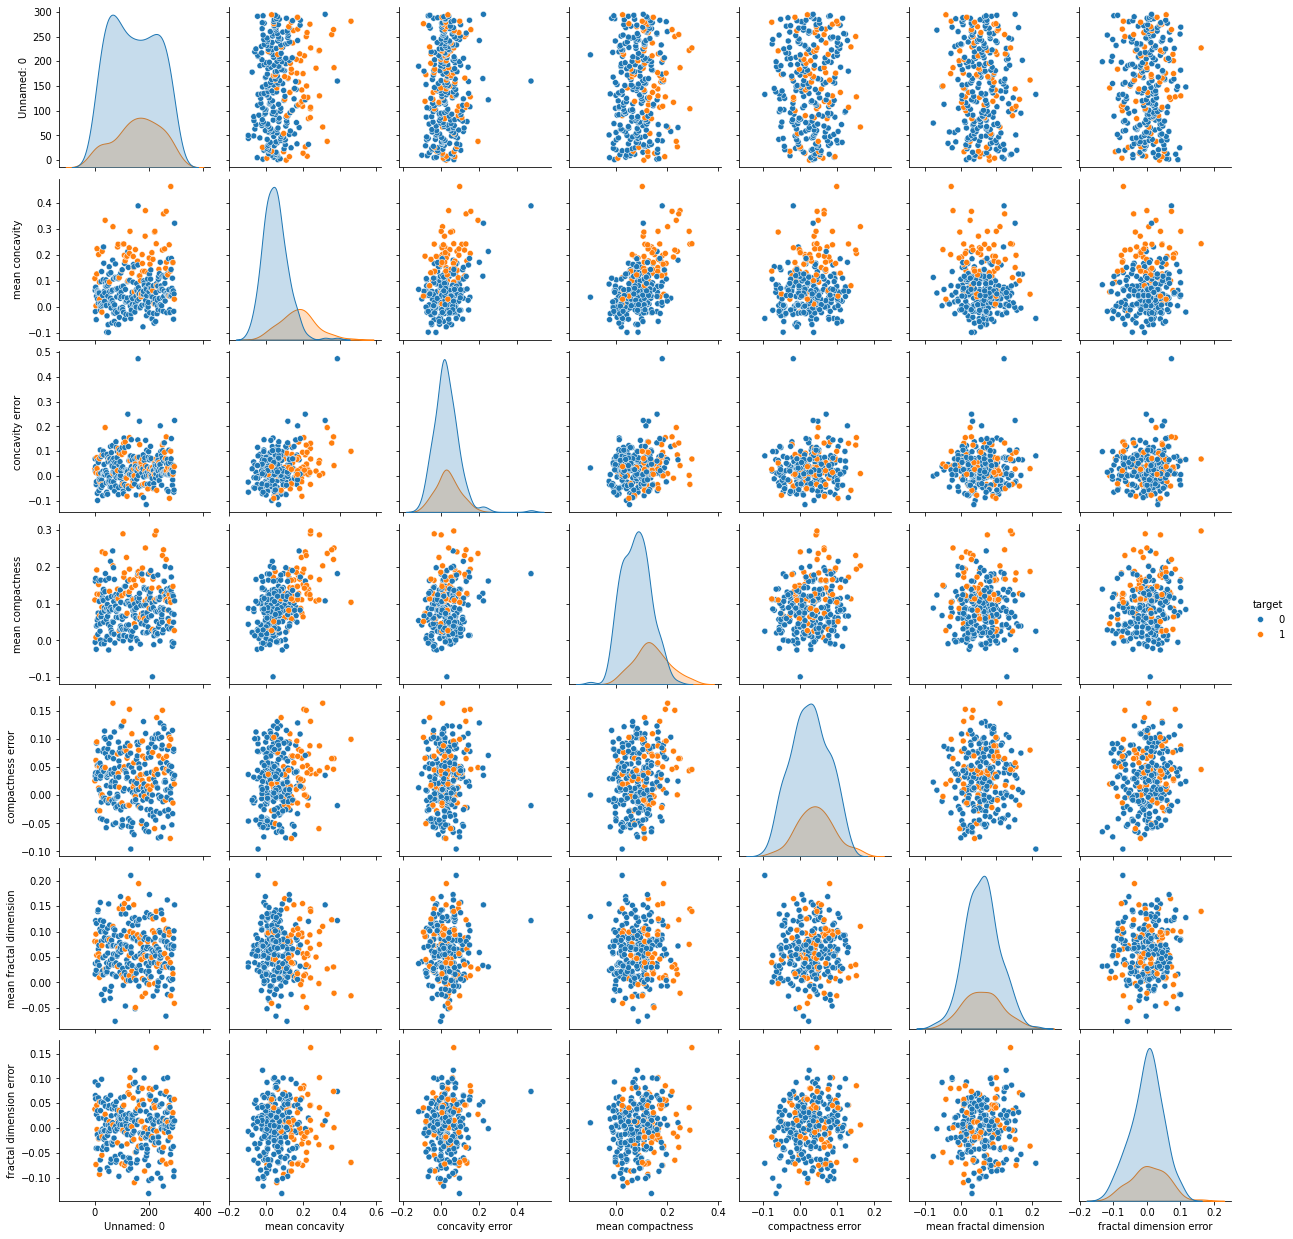

In [3]:
import seaborn as sns
sns.pairplot(train_df, hue="target")

In [4]:
train_df.head()

,Unnamed: 0,mean concavity,concavity error,mean compactness,compactness error,mean fractal dimension,fractal dimension error,target
0,0,0.109220,0.028755,0.109798,0.025444,0.080624,0.037745,1
1,1,0.063583,0.069334,-0.005277,0.034413,0.016120,0.092691,0
2,2,-0.017783,0.019632,0.160656,0.034202,0.037056,0.065313,0
3,3,0.075947,0.038190,0.168563,0.039751,0.121524,0.058760,0
4,4,0.004123,0.013759,0.008138,0.061797,0.094968,-0.073863,1


Confusion Matrix:
[[71  3]
 [ 7 11]]
Accuracy: 0.8913043478260869
Precision: 0.7857142857142857
Recall: 0.6111111111111112
AUC: 0.8971471471471472


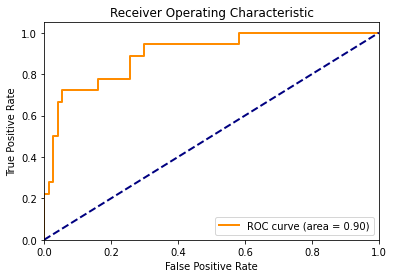

In [5]:
# Separate features and target variable
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_val = val_df.drop('target', axis=1)
y_val = val_df['target']

lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lda.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC
y_scores = lda.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

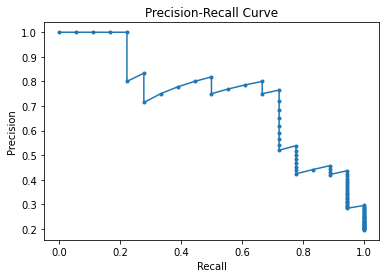

In [6]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [7]:
lda_coef = lda.coef_
feature_importance = pd.DataFrame(lda_coef.T, index=X_train.columns, columns=['Importance'])
print(feature_importance.sort_values(by='Importance', ascending=False))

                         Importance
mean concavity            21.071982
mean compactness          11.962336
compactness error          4.249302
mean fractal dimension     1.255943
Unnamed: 0                 0.000664
fractal dimension error   -0.655793
concavity error           -5.376268


## Cross-validation y test set

Test Set Metrics:
Confusion Matrix:
[[51  4]
 [ 7  7]]
Accuracy: 0.8405797101449275
Precision: 0.6363636363636364
Recall: 0.5
AUC (ROC) Test Set: 0.7870129870129869

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.8685314685314685
Mean Cross-Validation AUC (ROC): 0.8615432003696287


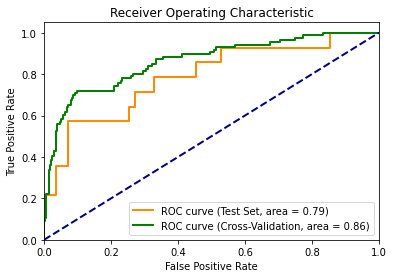

In [8]:
from sklearn.model_selection import cross_val_predict, cross_val_score
# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Initialize and train the LDA model on the combined set
lda = LinearDiscriminantAnalysis()
lda.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = lda.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = lda.decision_function(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(lda, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(lda, X_combined, y_combined, cv=5, method='decision_function')
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN

Best k: 15
Confusion Matrix:
[[72  2]
 [18  0]]
Accuracy: 0.782608695652174
Precision: 0.0
Recall: 0.0
AUC (ROC): 0.5037537537537538


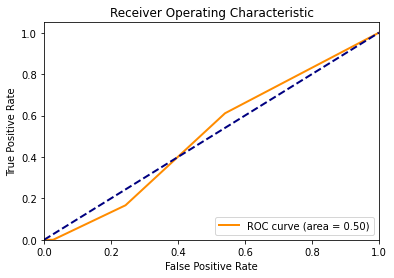

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Hyperparameters to tune (k values)
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
# Initialize variables to store best model and its performance
best_auc = 0
best_k = None
best_model = None

# Iterate over different values of k
for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_proba = knn.predict_proba(X_val)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Update best model if current model has higher AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_k = k
        best_model = knn

print("Best k:", k)
# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC using the best model
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC (ROC):", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Test Set Metrics:
Confusion Matrix:
[[55  0]
 [13  1]]
Accuracy: 0.8115942028985508
Precision: 1.0
Recall: 0.07142857142857142
AUC (ROC) Test Set: 0.5941558441558441

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.6296037296037296
Mean Cross-Validation AUC (ROC): 0.4691205914061297


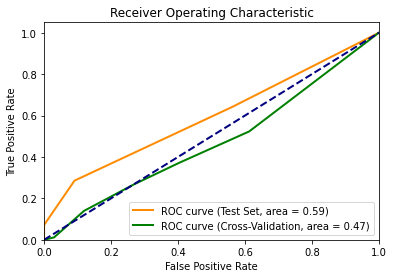

In [10]:
# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Train KNN model on the combined set
knn = KNeighborsClassifier(n_neighbors=best_k)  # Using the best k value found in previous step
knn.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = knn.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(knn, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(knn, X_combined, y_combined, cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Regresión Logistica

Best lambda: 1
Confusion Matrix:
[[74  0]
 [17  1]]
Accuracy: 0.8152173913043478
Precision: 1.0
Recall: 0.05555555555555555
AUC (ROC): 0.9001501501501501


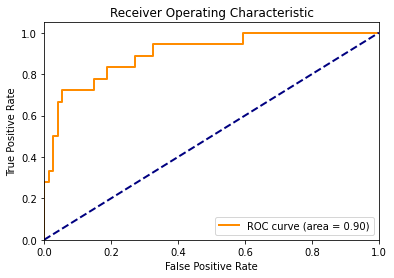

In [11]:
from sklearn.linear_model import LogisticRegression
# Hyperparameters to tune (lambda values)
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize variables to store best model and its performance
best_auc = 0
best_lambda = None
best_model = None

# Iterate over different values of lambda
for lambda_val in lambda_values:
    # Train logistic regression model with L2 regularization
    lr = LogisticRegression(penalty='l2', C=1/lambda_val, solver='liblinear')
    lr.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_proba = lr.predict_proba(X_val)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Update best model if current model has higher AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_lambda = lambda_val
        best_model = lr

print("Best lambda:", best_lambda)
# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

# Calculate ROC curve and AUC using the best model
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC (ROC):", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Test Set Metrics:
Confusion Matrix:
[[54  1]
 [11  3]]
Accuracy: 0.8260869565217391
Precision: 0.75
Recall: 0.21428571428571427
AUC (ROC) Test Set: 0.7974025974025973

Cross-Validation Metrics:
Mean Cross-Validation Accuracy: 0.7887112887112887
Mean Cross-Validation AUC (ROC): 0.8540351147389497


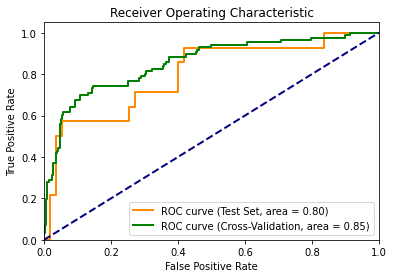

In [12]:
# Combine training and validation sets for cross-validation
combined_df = pd.concat([train_df, val_df], axis=0)

# Separate features and target variable
X_combined = combined_df.drop('target', axis=1)
y_combined = combined_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Train logistic regression model with L2 regularization on the combined set
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred_test = lr.predict(X_test)

# Calculate evaluation metrics for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

# Calculate ROC curve and AUC for the test set
y_scores_test = lr.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Perform 5-fold cross-validation on the combined set
cv_scores = cross_val_score(lr, X_combined, y_combined, cv=5)
y_pred_cv = cross_val_predict(lr, X_combined, y_combined, cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, _ = roc_curve(y_combined, y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Print evaluation metrics for the test set
print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("AUC (ROC) Test Set:", roc_auc_test)

# Print evaluation metrics for cross-validation
print("\nCross-Validation Metrics:")
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Mean Cross-Validation AUC (ROC):", roc_auc_cv)

# Plot ROC curve for the test set and cross-validation
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
plt.plot(fpr_cv, tpr_cv, color='green', lw=2, label='ROC curve (Cross-Validation, area = %0.2f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## RESAMPLING

## 1. LDA

Applying Original
Metrics for Original:
Confusion Matrix:
[[52  3]
 [ 7  7]]
Accuracy: 0.855072463768116
Precision: 0.7
Recall: 0.5
AUC (ROC): 0.7922077922077922


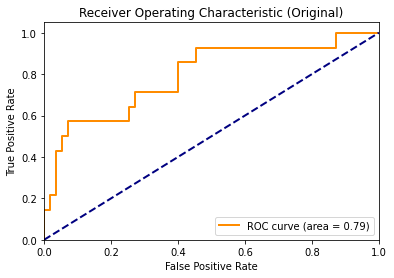

Applying Undersampling
Metrics for Undersampling:
Confusion Matrix:
[[52  3]
 [ 6  8]]
Accuracy: 0.8695652173913043
Precision: 0.7272727272727273
Recall: 0.5714285714285714
AUC (ROC): 0.7896103896103895


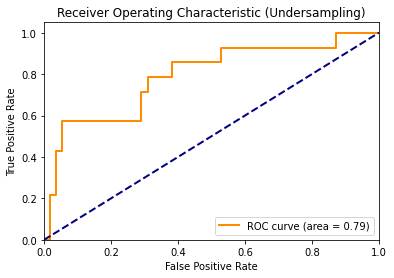

Applying Oversampling
Metrics for Oversampling:
Confusion Matrix:
[[51  4]
 [ 6  8]]
Accuracy: 0.855072463768116
Precision: 0.6666666666666666
Recall: 0.5714285714285714
AUC (ROC): 0.7779220779220779


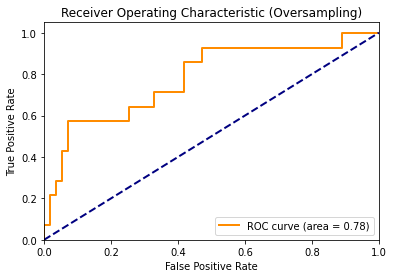

Applying SMOTE
Metrics for SMOTE:
Confusion Matrix:
[[51  4]
 [ 6  8]]
Accuracy: 0.855072463768116
Precision: 0.6666666666666666
Recall: 0.5714285714285714
AUC (ROC): 0.7948051948051947


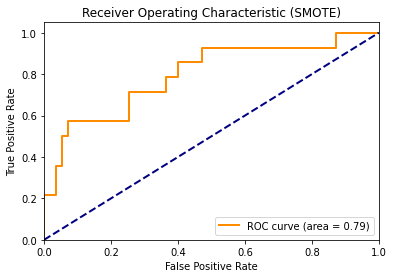

Applying Cost Re-weighting
Metrics for Cost Re-weighting:
Confusion Matrix:
[[51  4]
 [ 6  8]]
Accuracy: 0.855072463768116
Precision: 0.6666666666666666
Recall: 0.5714285714285714
AUC (ROC): 0.7974025974025974


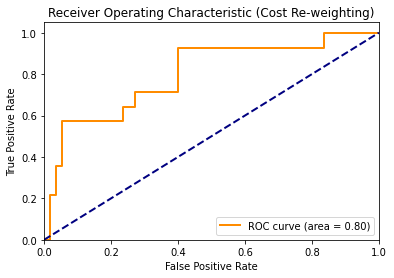

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define the resampling techniques to try
resampling_methods = {
    "Original": (None, None),  # No resampling
    "Undersampling": (RandomUnderSampler(random_state=42), None),
    "Oversampling": (RandomOverSampler(random_state=42), None),
    "SMOTE": (SMOTE(random_state=42), None),
    "Cost Re-weighting": (None, compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
}

for method_name, (resampler, class_weights) in resampling_methods.items():
    print(f"Applying {method_name}")

    if resampler is not None:
        # Apply resampling
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        X_combined_resampled = pd.concat([X_train_resampled, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train_resampled, y_val], axis=0)
    else:
        # Use original data
        X_combined_resampled = pd.concat([X_train, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train, y_val], axis=0)

    if method_name == "Cost Re-weighting":
        # Train Logistic Regression with class weights
        clf = LogisticRegression(class_weight=dict(zip(np.unique(y_train), class_weights)), solver='lbfgs', max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        y_scores_test = clf.decision_function(X_test)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
        roc_auc_test = auc(fpr_test, tpr_test)

        print(f"Metrics for {method_name}:")
        print("Confusion Matrix:")
        print(conf_matrix_test)
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)
        print("AUC (ROC):", roc_auc_test)

        # Plot ROC curve for the test set
        plt.figure()
        plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({method_name})')
        plt.legend(loc="lower right")
        plt.show()

        continue

    # Train the LDA model
    lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    lda.fit(X_combined_resampled, y_combined_resampled)

    # Evaluate the model
    y_pred_test = lda.predict(X_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    y_scores_test = lda.decision_function(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    print(f"Metrics for {method_name}:")
    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("AUC (ROC):", roc_auc_test)

    # Plot ROC curve for the test set
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({method_name})')
    plt.legend(loc="lower right")
    plt.show()


## 2. KNN

Applying Original
Metrics for Original:
Confusion Matrix:
[[55  0]
 [14  0]]
Accuracy: 0.7971014492753623
Precision: 0.0
Recall: 0.0
AUC (ROC): 0.6142857142857143


/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


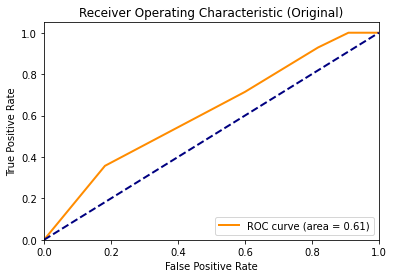

Applying Undersampling
Metrics for Undersampling:
Confusion Matrix:
[[55  0]
 [14  0]]
Accuracy: 0.7971014492753623
Precision: 0.0
Recall: 0.0
AUC (ROC): 0.5584415584415585


/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


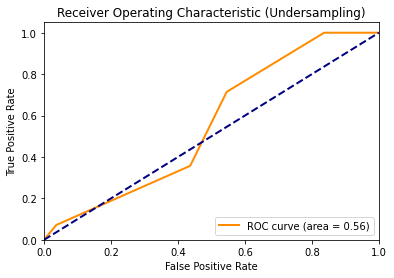

Applying Oversampling
Metrics for Oversampling:
Confusion Matrix:
[[43 12]
 [13  1]]
Accuracy: 0.6376811594202898
Precision: 0.07692307692307693
Recall: 0.07142857142857142
AUC (ROC): 0.5019480519480519


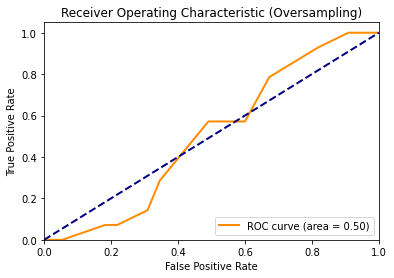

Applying SMOTE
Metrics for SMOTE:
Confusion Matrix:
[[53  2]
 [11  3]]
Accuracy: 0.8115942028985508
Precision: 0.6
Recall: 0.21428571428571427
AUC (ROC): 0.5720779220779221


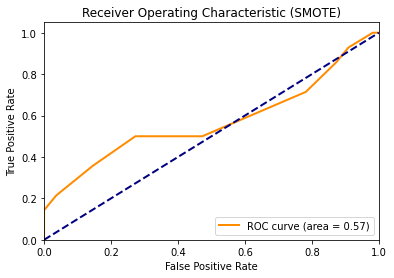

Applying Cost Re-weighting
Metrics for Cost Re-weighting:
Confusion Matrix:
[[55  0]
 [14  0]]
Accuracy: 0.7971014492753623
Precision: 0.0
Recall: 0.0
AUC (ROC): 0.4188311688311689


/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


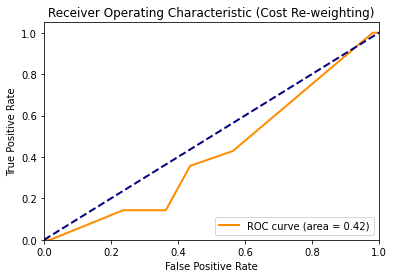

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the resampling techniques to try
resampling_methods = {
    "Original": (None, None),  # No resampling
    "Undersampling": (RandomUnderSampler(random_state=42), None),
    "Oversampling": (RandomOverSampler(random_state=42), None),
    "SMOTE": (SMOTE(random_state=42), None),
    "Cost Re-weighting": (None, compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
}

for method_name, (resampler, class_weights) in resampling_methods.items():
    print(f"Applying {method_name}")

    if resampler is not None:
        # Apply resampling
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        X_combined_resampled = pd.concat([X_train_resampled, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train_resampled, y_val], axis=0)
    else:
        # Use original data
        X_combined_resampled = pd.concat([X_train, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train, y_val], axis=0)

    if method_name == "Cost Re-weighting":
        # Train KNN with class weights
        clf = KNeighborsClassifier(n_neighbors=15)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        y_scores_test = clf.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
        roc_auc_test = auc(fpr_test, tpr_test)

        print(f"Metrics for {method_name}:")
        print("Confusion Matrix:")
        print(conf_matrix_test)
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)
        print("AUC (ROC):", roc_auc_test)

        # Plot ROC curve for the test set
        plt.figure()
        plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({method_name})')
        plt.legend(loc="lower right")
        plt.show()

        continue

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_combined_resampled, y_combined_resampled)

    # Evaluate the model
    y_pred_test = knn.predict(X_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    y_scores_test = knn.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    print(f"Metrics for {method_name}:")
    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("AUC (ROC):", roc_auc_test)

    # Plot ROC curve for the test set
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({method_name})')
    plt.legend(loc="lower right")
    plt.show()


## 3. Regresion Logistica

Applying Original
Metrics for Original:
Confusion Matrix:
[[54  1]
 [11  3]]
Accuracy: 0.8260869565217391
Precision: 0.75
Recall: 0.21428571428571427
AUC (ROC): 0.7987012987012988


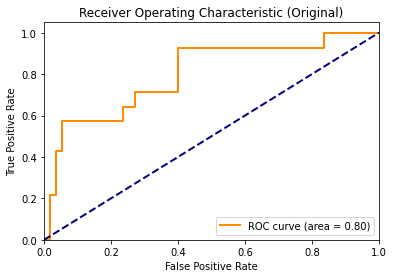

Applying Undersampling
Metrics for Undersampling:
Confusion Matrix:
[[54  1]
 [11  3]]
Accuracy: 0.8260869565217391
Precision: 0.75
Recall: 0.21428571428571427
AUC (ROC): 0.7896103896103895


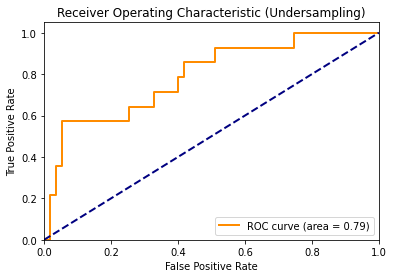

Applying Oversampling
Metrics for Oversampling:
Confusion Matrix:
[[52  3]
 [ 6  8]]
Accuracy: 0.8695652173913043
Precision: 0.7272727272727273
Recall: 0.5714285714285714
AUC (ROC): 0.7883116883116883


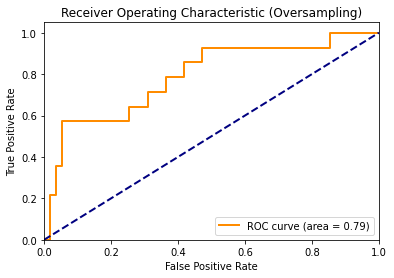

Applying SMOTE
Metrics for SMOTE:
Confusion Matrix:
[[52  3]
 [ 6  8]]
Accuracy: 0.8695652173913043
Precision: 0.7272727272727273
Recall: 0.5714285714285714
AUC (ROC): 0.7948051948051948


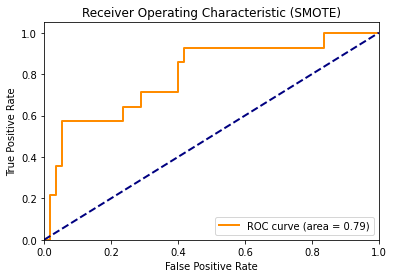

Applying Cost Re-weighting
Metrics for Cost Re-weighting:
Confusion Matrix:
[[51  4]
 [ 6  8]]
Accuracy: 0.855072463768116
Precision: 0.6666666666666666
Recall: 0.5714285714285714
AUC (ROC): 0.7974025974025974


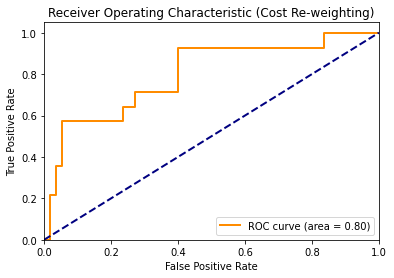

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Define the resampling techniques to try
resampling_methods = {
    "Original": (None, None),  # No resampling
    "Undersampling": (RandomUnderSampler(random_state=42), None),
    "Oversampling": (RandomOverSampler(random_state=42), None),
    "SMOTE": (SMOTE(random_state=42), None),
    "Cost Re-weighting": (None, compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
}

for method_name, (resampler, class_weights) in resampling_methods.items():
    print(f"Applying {method_name}")

    if resampler is not None:
        # Apply resampling
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        X_combined_resampled = pd.concat([X_train_resampled, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train_resampled, y_val], axis=0)
    else:
        # Use original data
        X_combined_resampled = pd.concat([X_train, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train, y_val], axis=0)

    if method_name == "Cost Re-weighting":
        # Train Logistic Regression with class weights
        clf = LogisticRegression(penalty='l2', class_weight='balanced', solver='lbfgs', max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        conf_matrix_test = confusion_matrix(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        y_scores_test = clf.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
        roc_auc_test = auc(fpr_test, tpr_test)

        print(f"Metrics for {method_name}:")
        print("Confusion Matrix:")
        print(conf_matrix_test)
        print("Accuracy:", accuracy_test)
        print("Precision:", precision_test)
        print("Recall:", recall_test)
        print("AUC (ROC):", roc_auc_test)

        # Plot ROC curve for the test set
        plt.figure()
        plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({method_name})')
        plt.legend(loc="lower right")
        plt.show()

        continue

    # Train the Logistic Regression model
    clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
    clf.fit(X_combined_resampled, y_combined_resampled)

    # Evaluate the model
    y_pred_test = clf.predict(X_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    y_scores_test = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    print(f"Metrics for {method_name}:")
    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("AUC (ROC):", roc_auc_test)

    # Plot ROC curve for the test set
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({method_name})')
    plt.legend(loc="lower right")
    plt.show()


Applying Original

Validation Set Metrics (Original):
Confusion Matrix:
[[74  0]
 [17  1]]
Accuracy: 0.8152173913043478
Precision: 1.0
Recall: 0.05555555555555555
AUC (ROC): 0.9076576576576576


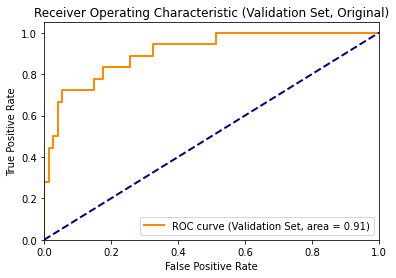


Test Set Metrics (Original):
Confusion Matrix:
[[54  1]
 [11  3]]
Accuracy: 0.8260869565217391
Precision: 0.75
Recall: 0.21428571428571427
AUC (ROC): 0.7987012987012988


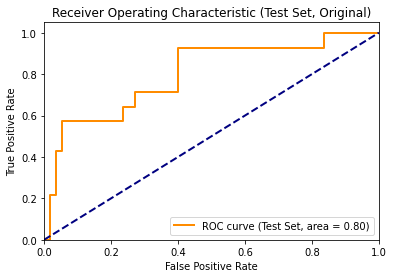

Applying Undersampling

Validation Set Metrics (Undersampling):
Confusion Matrix:
[[74  0]
 [17  1]]
Accuracy: 0.8152173913043478
Precision: 1.0
Recall: 0.05555555555555555
AUC (ROC): 0.9219219219219219


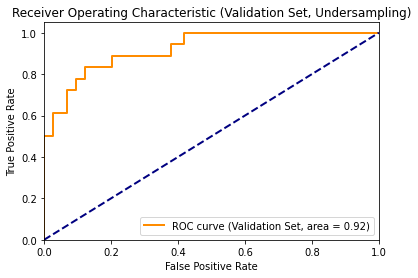


Test Set Metrics (Undersampling):
Confusion Matrix:
[[54  1]
 [11  3]]
Accuracy: 0.8260869565217391
Precision: 0.75
Recall: 0.21428571428571427
AUC (ROC): 0.7896103896103895


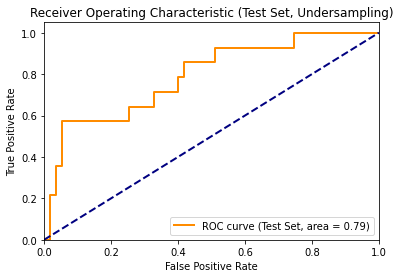

Applying Oversampling

Validation Set Metrics (Oversampling):
Confusion Matrix:
[[71  3]
 [ 6 12]]
Accuracy: 0.9021739130434783
Precision: 0.8
Recall: 0.6666666666666666
AUC (ROC): 0.9031531531531531


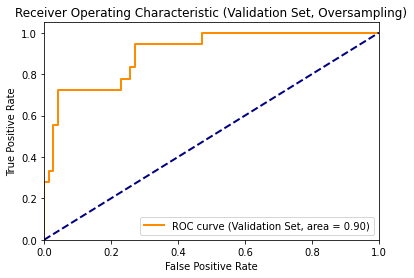


Test Set Metrics (Oversampling):
Confusion Matrix:
[[52  3]
 [ 6  8]]
Accuracy: 0.8695652173913043
Precision: 0.7272727272727273
Recall: 0.5714285714285714
AUC (ROC): 0.7883116883116883


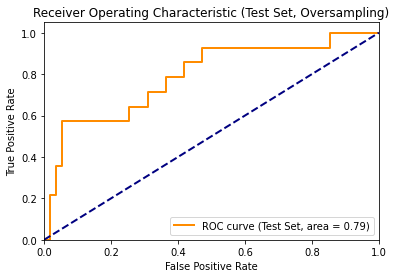

Applying SMOTE

Validation Set Metrics (SMOTE):
Confusion Matrix:
[[71  3]
 [ 7 11]]
Accuracy: 0.8913043478260869
Precision: 0.7857142857142857
Recall: 0.6111111111111112
AUC (ROC): 0.9099099099099099


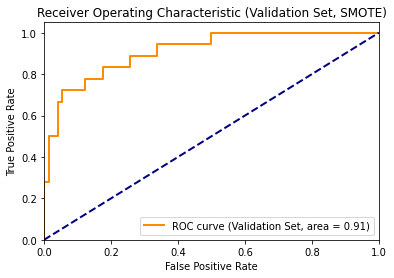


Test Set Metrics (SMOTE):
Confusion Matrix:
[[52  3]
 [ 6  8]]
Accuracy: 0.8695652173913043
Precision: 0.7272727272727273
Recall: 0.5714285714285714
AUC (ROC): 0.7948051948051948


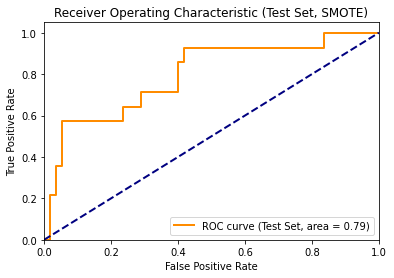

Applying Cost Re-weighting

Validation Set Metrics (Cost Re-weighting):
Confusion Matrix:
[[69  5]
 [ 5 13]]
Accuracy: 0.8913043478260869
Precision: 0.7222222222222222
Recall: 0.7222222222222222
AUC (ROC): 0.9001501501501501


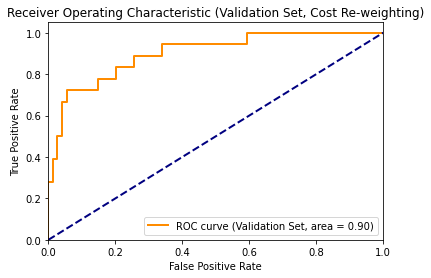


Test Set Metrics (Cost Re-weighting):
Confusion Matrix:
[[51  4]
 [ 6  8]]
Accuracy: 0.855072463768116
Precision: 0.6666666666666666
Recall: 0.5714285714285714
AUC (ROC): 0.7974025974025974


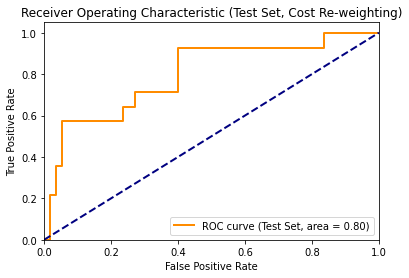

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Define the resampling techniques to try
resampling_methods = {
    "Original": (None, None),  # No resampling
    "Undersampling": (RandomUnderSampler(random_state=42), None),
    "Oversampling": (RandomOverSampler(random_state=42), None),
    "SMOTE": (SMOTE(random_state=42), None),
    "Cost Re-weighting": (None, compute_class_weight('balanced', classes=np.unique(y_train), y=y_train))
}

for method_name, (resampler, class_weights) in resampling_methods.items():
    print(f"Applying {method_name}")

    if resampler is not None:
        # Apply resampling
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
        X_combined_resampled = pd.concat([X_train_resampled, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train_resampled, y_val], axis=0)
    else:
        # Use original data
        X_combined_resampled = pd.concat([X_train, X_val], axis=0)
        y_combined_resampled = pd.concat([y_train, y_val], axis=0)

    if method_name == "Cost Re-weighting":
        # Train Logistic Regression with class weights
        clf = LogisticRegression(penalty='l2', class_weight='balanced', solver='lbfgs', max_iter=1000)
        clf.fit(X_train, y_train)
    else:
        # Train Logistic Regression model
        clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
        clf.fit(X_combined_resampled, y_combined_resampled)

    # Evaluate on validation set
    y_pred_val = clf.predict(X_val)
    conf_matrix_val = confusion_matrix(y_val, y_pred_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)
    y_scores_val = clf.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_scores_val)
    roc_auc_val = auc(fpr_val, tpr_val)

    # Print evaluation metrics for validation set
    print(f"\nValidation Set Metrics ({method_name}):")
    print("Confusion Matrix:")
    print(conf_matrix_val)
    print("Accuracy:", accuracy_val)
    print("Precision:", precision_val)
    print("Recall:", recall_val)
    print("AUC (ROC):", roc_auc_val)

    # Plot ROC curve for the validation set
    plt.figure()
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='ROC curve (Validation Set, area = %0.2f)' % roc_auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (Validation Set, {method_name})')
    plt.legend(loc="lower right")
    plt.show()

    # Evaluate on test set
    y_pred_test = clf.predict(X_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    y_scores_test = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Print evaluation metrics for test set
    print(f"\nTest Set Metrics ({method_name}):")
    print("Confusion Matrix:")
    print(conf_matrix_test)
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("AUC (ROC):", roc_auc_test)

    # Plot ROC curve for the test set
    plt.figure()
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test Set, area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (Test Set, {method_name})')
    plt.legend(loc="lower right")
    plt.show()

Run until here. The following portion of code is destined to modify the target names (1 for malignant and 0 for beningn)

In [17]:
def plot_target_distribution(file_df, dataset_name):
    # Load the dataset
    df = file_df
    
    # Count the number of occurrences for each target (0 and 1)
    target_counts = df['target'].value_counts()
    total_samples = len(df)
    
    # Calculate percentage for each class
    target_percentages = (target_counts / total_samples) * 100
    
    # Print the number of samples and percentages for each class
    print(f"Target distribution in {dataset_name}:")
    for target_class, count in target_counts.items():
        percentage = target_percentages[target_class]
        print(f"Class {target_class}: {count} samples ({percentage:.2f}%)")
 
    # Plotting
    plt.figure(figsize=(6,4))
    target_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
    plt.title(f'Target Distribution in {dataset_name}')
    plt.xlabel('Target')
    plt.ylabel('Count')
    #plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
    plt.show()

Target distribution in Train Dataset:
Class 0: 228 samples (77.03%)
Class 1: 68 samples (22.97%)


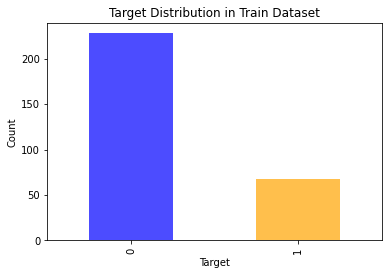

Target distribution in Validation Dataset:
Class 0: 74 samples (80.43%)
Class 1: 18 samples (19.57%)


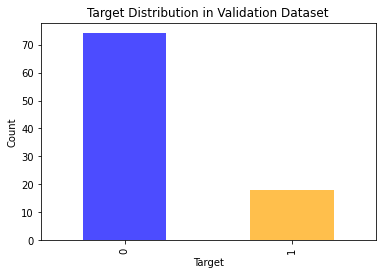

Target distribution in Test Dataset:
Class 0: 55 samples (79.71%)
Class 1: 14 samples (20.29%)


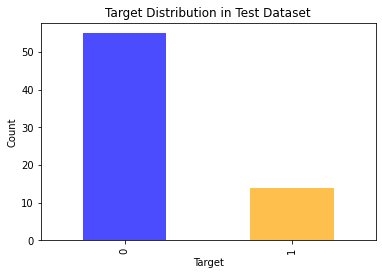

In [18]:
# Plot target distribution for each dataset
plot_target_distribution(train_df, 'Train Dataset')
plot_target_distribution(val_df, 'Validation Dataset')
plot_target_distribution(test_df, 'Test Dataset')

Train df change target names (0:bening, 1:malignant)

In [19]:
print(train_df['target'].value_counts())

target
0    228
1     68
Name: count, dtype: int64


In [20]:
# Invert the target values
train_df['target'] = train_df['target'].apply(lambda x: 1 if x == 0 else 0)

# Check the new distribution of target values
print(train_df['target'].value_counts())


target
1    228
0     68
Name: count, dtype: int64


In [21]:
train_df.head()

,Unnamed: 0,mean concavity,concavity error,mean compactness,compactness error,mean fractal dimension,fractal dimension error,target
0,0,0.109220,0.028755,0.109798,0.025444,0.080624,0.037745,0
1,1,0.063583,0.069334,-0.005277,0.034413,0.016120,0.092691,1
2,2,-0.017783,0.019632,0.160656,0.034202,0.037056,0.065313,1
3,3,0.075947,0.038190,0.168563,0.039751,0.121524,0.058760,1
4,4,0.004123,0.013759,0.008138,0.061797,0.094968,-0.073863,0


In [22]:
train_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_train_2s2024.csv')

Valid df

In [23]:
print(val_df['target'].value_counts())

target
0    74
1    18
Name: count, dtype: int64


In [24]:
# Invert the target values
val_df['target'] = val_df['target'].apply(lambda x: 1 if x == 0 else 0)

# Check the new distribution of target values
print(val_df['target'].value_counts())

target
1    74
0    18
Name: count, dtype: int64


In [25]:
val_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_val_2s2024.csv')

Test df


In [26]:
print(test_df['target'].value_counts())

target
0    55
1    14
Name: count, dtype: int64


In [27]:
# Invert the target values
test_df['target'] = test_df['target'].apply(lambda x: 1 if x == 0 else 0)

# Check the new distribution of target values
print(test_df['target'].value_counts())

target
1    55
0    14
Name: count, dtype: int64


In [28]:
test_df.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP3_2S2024/Breast_Cancer/Data/1 - Breast Cancer Diagnosis/Imbalanced/breast_cancer_test_2s2024.csv')